**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

## 1 - Packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases_v2 import *

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset

In [21]:
X, Y = load_planar_dataset()

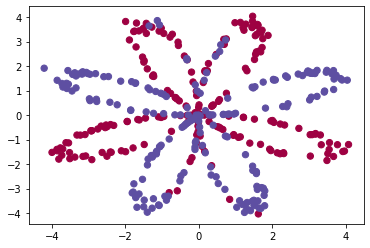

In [22]:
# Visualize
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)

In [23]:
# Shape of dataset
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

## 3 - Simple Logistic Regression

In [36]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV()

Accuracy : 47.0 %


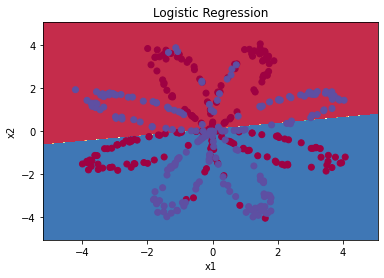

In [39]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
LR_accuracy = float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions)) / float(Y.size))
print ('Accuracy : {} %'.format(LR_accuracy*100))

## 4 - Neural Network Model
- Train a Neural Network with a single hidden layer size of 4 (tanh)

### 4.1 - Defining the neural network structure

In [45]:
def layer_sizes(X, Y):
    '''
    Arguments
    X, Y : input dataset and label
    =====================================================
    Returns
    n_x, n_h, n_y : sizes of input, hidden, output layers
    '''
    n_h = 4
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

### 4.2 - Initialize the model's parameters

In [47]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    Arguments
    n_x, n_h, n_y : sizes of input, hidden, ouput layers
    =====================================================
    Returns
    Parameters : W1 : weight matrix (n_h, n_x)
                 b1 : bias (n_h, 1)
                 W2 : weight matrix (n_y, n_h)
                 b2 : bias(n_y, 1)
    '''
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {'W1':W1, 'b1':b1, "W2":W2, 'b2':b2}
    return parameters
    

### 4.3 - The loop
 - Forward > Compute cost > Backward > Update parameters

In [52]:
def forward_propagation(X, parameters):
    '''
    Arguments
    X : input data (n_x, m)
    parameters
    ================================================================
    Returns
    A2 : Sigmoid ouput
    cache : for backward propagation
    '''
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}
    
    return A2, cache

In [54]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = Y*np.log(A2) + (1-Y)*np.log(1-A2)
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [56]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    # calculate backward_propagation
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1-A1**2)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2}
    
    return grads

In [58]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

### 4.4 - Integrate parts

In [62]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X : dataset (2, number of examples)
    Y : labels (1, number of examples)
    n_h : size of the hidden layer
    num_iterations : Number of iterations in gradient descent loop
    print_cost : if True, print the cost every 1000 iterations
    ================================================================
    Returns:
    parameters : parameters learnt by the model.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### 4.5 - Predictions

In [68]:
def predict(parameters, X):
    """
    Arguments:
    parameters
    X : input data of size (n_x, m)
    ================================================================
    Returns
    predictions : vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5) * 1
    
    return predictions

Cost after iteration 0: 0.692992
Cost after iteration 1000: 0.167137
Cost after iteration 2000: 0.069092
Cost after iteration 3000: 0.063716
Cost after iteration 4000: 0.061312
Cost after iteration 5000: 0.059669
Cost after iteration 6000: 0.058364
Cost after iteration 7000: 0.057279
Cost after iteration 8000: 0.056359
Cost after iteration 9000: 0.055569


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

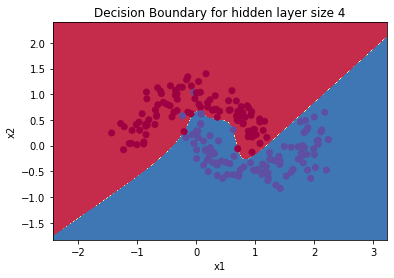

In [75]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [72]:
# Print accuracy
predictions = predict(parameters, X)
accuracy = (np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T)) / float(Y.size)
print ('Accuracy: {} %'.format(np.squeeze(accuracy) * 100))

Accuracy: 90.75 %


### 4.6 - Tuning hidden layer size

Accuracy for 1 hidden units: 71.0 %
Accuracy for 2 hidden units: 84.0 %
Accuracy for 3 hidden units: 98.0 %
Accuracy for 4 hidden units: 97.5 %
Accuracy for 5 hidden units: 97.5 %
Accuracy for 20 hidden units: 100.0 %
Accuracy for 50 hidden units: 100.0 %


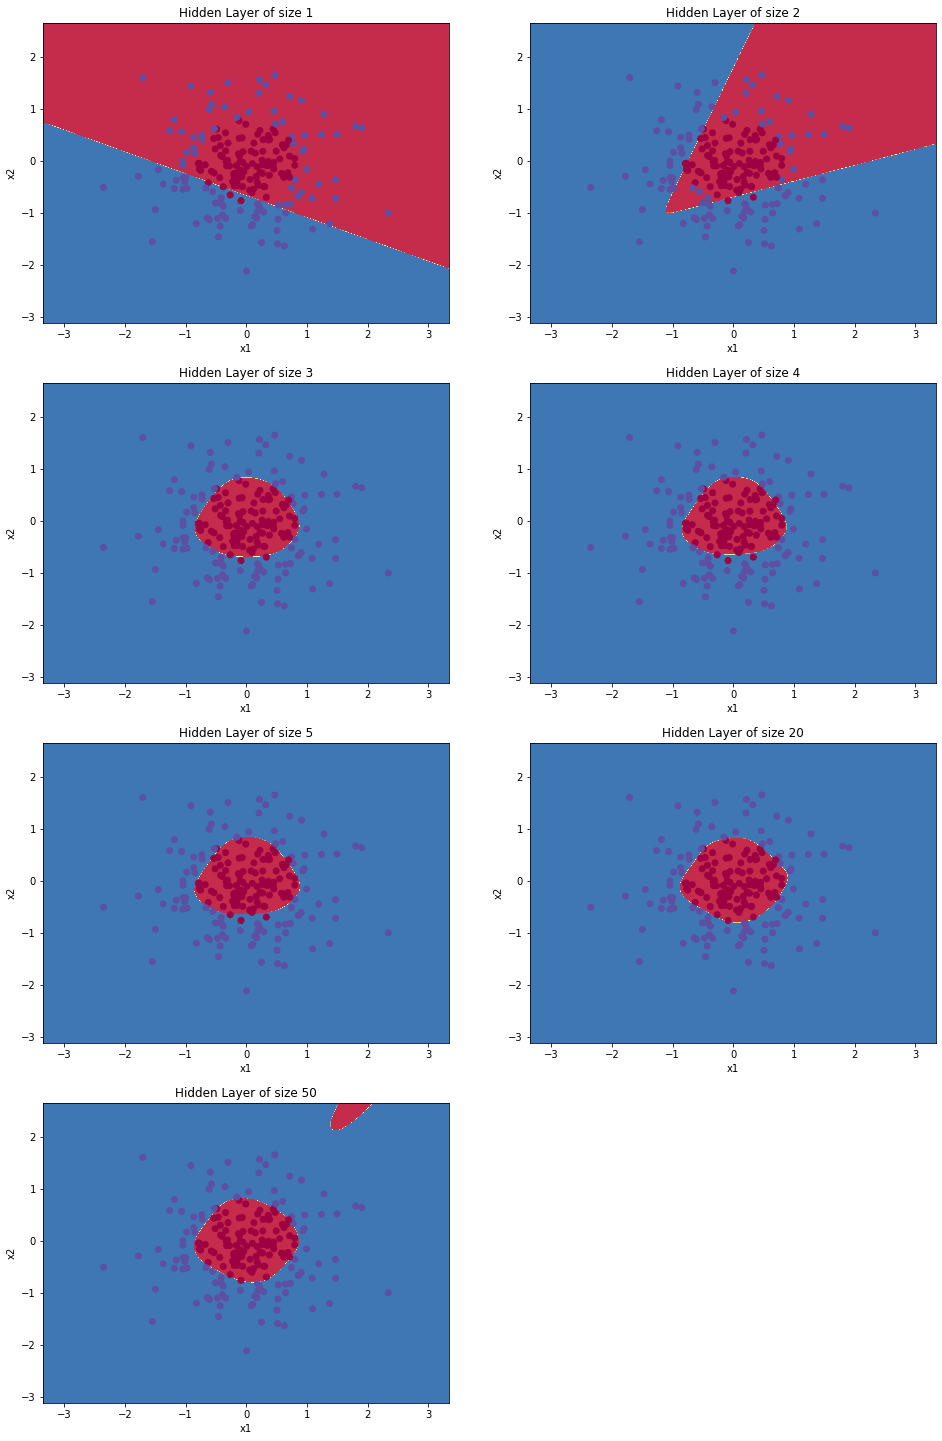

In [84]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## 5 - Performance on other Datasets

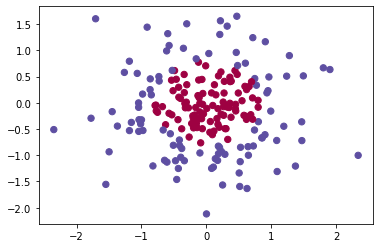

In [83]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

# choose your dataset
dataset = "gaussian_quantiles" # noisy_circles, noisy_moons, blobs, gaussian_quantiles

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);